In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
bnb_data = pd.read_csv('airbnb_listing_train.csv')

In [3]:
bnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [4]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [5]:
bnb_data.drop(['id','name','host_id','neighbourhood_group','last_review','host_name','neighbourhood'],axis=1,inplace=True)

In [6]:
bnb_data.head()

,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,52.35368,4.90177,Entire home/apt,3,13,0.27,1,0,220
1,52.35728,4.92052,Entire home/apt,4,14,0.29,1,0,110
2,52.37582,4.89850,Entire home/apt,2,9,1.65,1,7,100
3,52.37792,4.87300,Entire home/apt,3,42,0.72,1,0,130
4,52.38051,4.87493,Private room,2,89,4.02,1,24,90


In [7]:
room = pd.get_dummies(bnb_data['room_type'],drop_first=True)

In [8]:
bnb_data = pd.concat([room,bnb_data],axis=1)

In [9]:
bnb_data.head()

,Hotel room,Private room,Shared room,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0,0,0,52.35368,4.90177,Entire home/apt,3,13,0.27,1,0,220
1,0,0,0,52.35728,4.92052,Entire home/apt,4,14,0.29,1,0,110
2,0,0,0,52.37582,4.89850,Entire home/apt,2,9,1.65,1,7,100
3,0,0,0,52.37792,4.87300,Entire home/apt,3,42,0.72,1,0,130
4,0,1,0,52.38051,4.87493,Private room,2,89,4.02,1,24,90


In [10]:
bnb_data.isnull().sum()

Hotel room                           0
Private room                         0
Shared room                          0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1596
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [11]:
bnb_data.shape

(12901, 12)

In [12]:
bnb_data = bnb_data.dropna()

<AxesSubplot:>

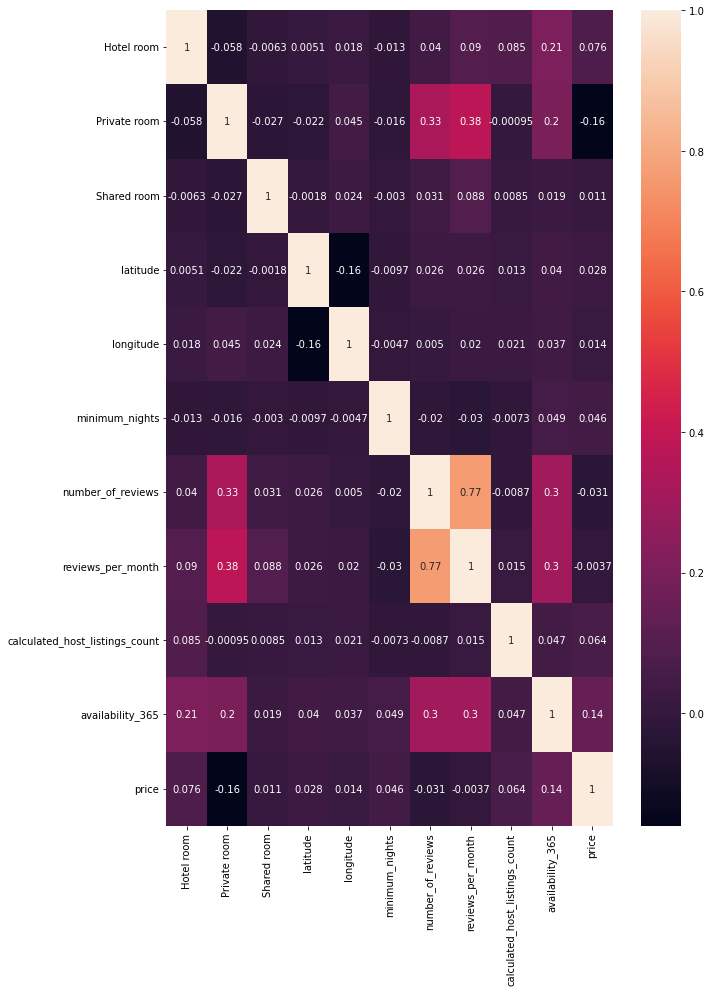

In [13]:
plt.figure(figsize=(10,15))
sns.heatmap(bnb_data.corr(),annot=True)

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='minimum_nights', ylabel='count'>

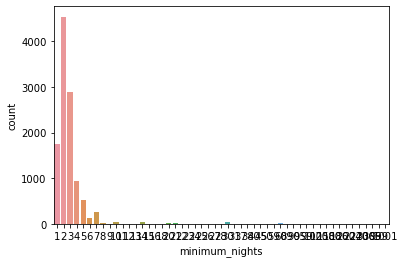

In [14]:
sns.countplot(bnb_data['minimum_nights'])

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

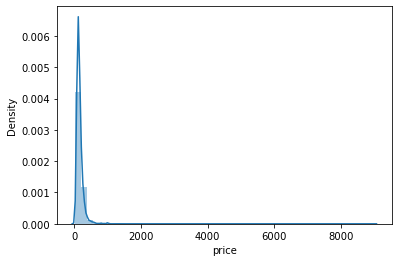

In [15]:
sns.distplot(bnb_data['price'])

In [16]:
bnb_data.drop(['room_type'],inplace=True,axis=1)

In [17]:
x = bnb_data.drop(['price'],axis=1)
y = bnb_data['price']

In [18]:
mm = MinMaxScaler()
mm.fit_transform(x)

array([[0.        , 0.        , 0.        , ..., 0.00520104, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00560112, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03280656, 0.        ,
        0.01917808],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0060012 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00720144, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.005001  , 0.12987013,
        1.        ]])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.predict(x_test)

array([159.35736889, 161.7165475 , 221.25135616, ..., 161.99938066,
        74.22169564, 153.82750074])

In [22]:
lr.score(x_test,y_test)

0.028016826604830736